# Датасет

**Heart Attack Analysis & Prediction Dataset**

A dataset for heart attack classification

[Ссылка на kaggle](https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset)

## About this dataset

* age: age of the patient
* sex: sex of the patient
* cp: chest pain type `тип боли в груди`
    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic
* trtbps: resting blood pressure (in mm Hg) `кровяное давление в состоянии покоя`
* chol: cholestoral in mg/dl fetched via BMI sensor `холестерин в мг/дл, полученный с помощью датчика ИМТ`
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) `уровень сахара в крови натощак`
* restecg: resting electrocardiographic results `результаты электрокардиографии в состоянии покоя`
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalachh: maximum heart rate achieved `максимальная достигнутая частота сердечных сокращений`
* exng: exercise induced angina (1 = yes; 0 = no) `стенокардия, вызванная физическими упражнениями`
* oldpeak: previous peak
* slp: slope `наклон (сердечного ритма)`
* caa: number of major vessels (0-3) `количество крупных сосудов`
* thall: thal rate `талассемия`
* output: 0 = less chance of heart attack; 1 = more chance of heart attack

In [1]:
import pandas as pd

data = pd.read_csv('../resources/heart.csv')

data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Проверям, что нет строк с NaN'ами.

In [2]:
data = data.dropna().drop_duplicates(ignore_index=True)

data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
298,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
299,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
300,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
import seaborn as sns

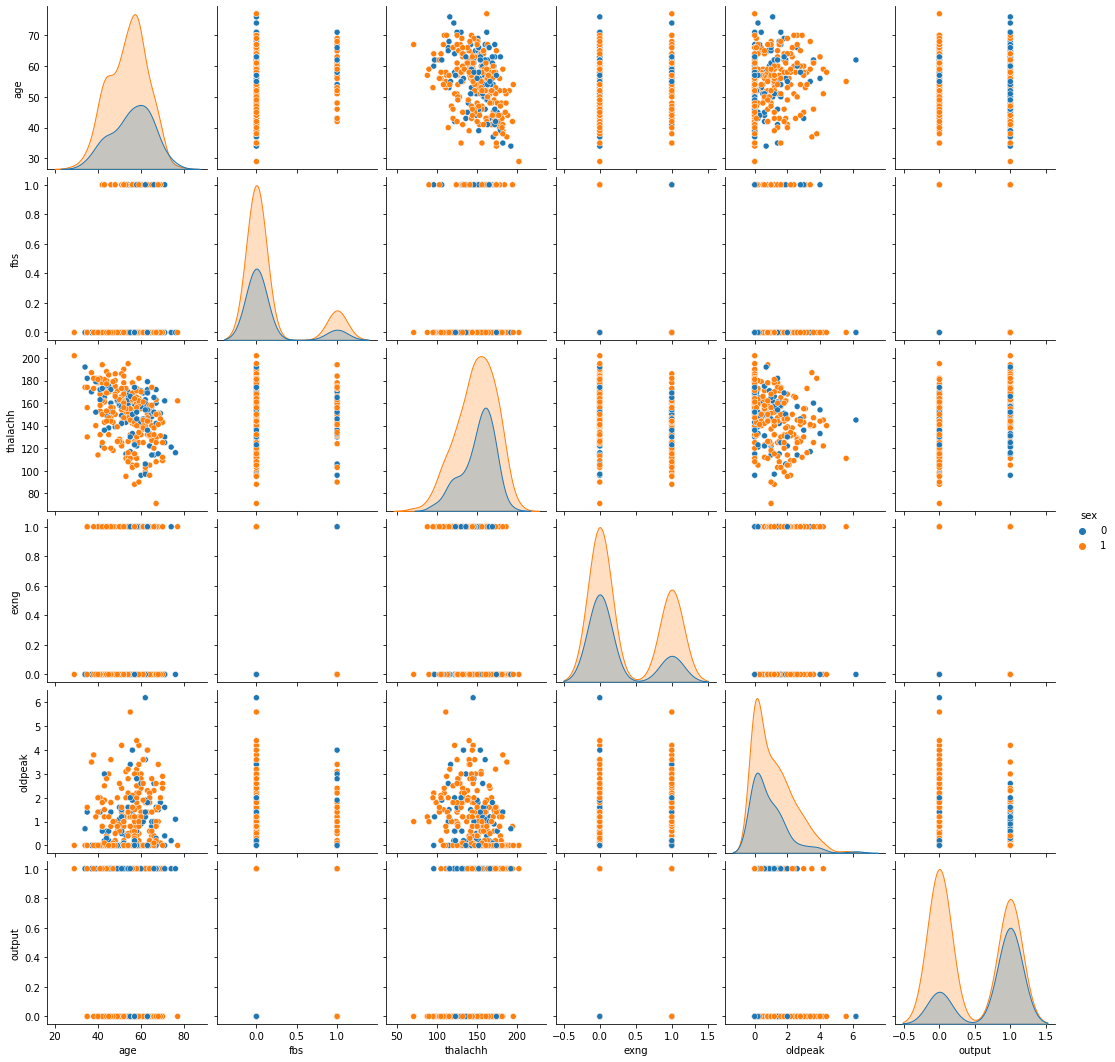

In [4]:
# fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) `уровень сахара в крови натощак`
# thalachh: maximum heart rate achieved `максимальная достигнутая частота сердечных сокращений`
# exng: exercise induced angina (1 = yes; 0 = no) `стенокардия, вызванная физическими упражнениями`
# oldpeak: previous peak
# output: 0 = less chance of heart attack; 1 = more chance of heart attack

sns.pairplot(
    data=data[['age', 'sex', 'fbs', 'thalachh', 'exng', 'oldpeak', 'output']],
    hue='sex')

In [5]:
%matplotlib inline
import umap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [6]:
def draw_umap(values, n_neighbors, min_dist, metric):
    reducer = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        metric=metric,
        random_state=0)
    
    embedding = reducer.fit_transform(values)
    
    colors = [sns.color_palette()[i] for i in data.sex]
    insafe_indexes = list(filter(lambda i: not data.output[i], range(len(data))))
    insafe = np.array([embedding[i] for i in insafe_indexes])
    insafe_colors = [colors[i] for i in insafe_indexes]
    atrisk_indexes = list(filter(lambda i: data.output[i], range(len(data))))
    atrisk = np.array([embedding[i] for i in atrisk_indexes])
    atrisk_colors = [colors[i] for i in atrisk_indexes]
    
    fig = plt.figure(figsize=(8, 8))
    subplot = fig.add_subplot(1, 1, 1)
    subplot.scatter(insafe[:, 0], insafe[:, 1], c=insafe_colors, marker='o')
    subplot.scatter(atrisk[:, 0], atrisk[:, 1], c=atrisk_colors, marker='x')
    
    mcolor = sns.color_palette()[0]
    fcolor = sns.color_palette()[1]
    subplot.legend(
        handles=[
            mlines.Line2D([], [], linestyle='None', color=mcolor, marker='o', markersize=10, label='Male in safe'),
            mlines.Line2D([], [], linestyle='None', color=mcolor, marker='x', markersize=10, label='Male at risk'),
            mlines.Line2D([], [], linestyle='None', color=fcolor, marker='o', markersize=10, label='Female in safe'),
            mlines.Line2D([], [], linestyle='None', color=fcolor, marker='x', markersize=10, label='Female at risk')],
        loc='lower right',
        framealpha=0.6,
        ncol=2)
    
    plt.title(f"n_neighbors={n_neighbors}, min_dist={min_dist}, metric={metric}")
    
    return embedding

In [7]:
from sklearn.preprocessing import StandardScaler

scaled_data_values = StandardScaler().fit_transform(data.values)

<ipython-input-6-21831f02483d>:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8, 8))


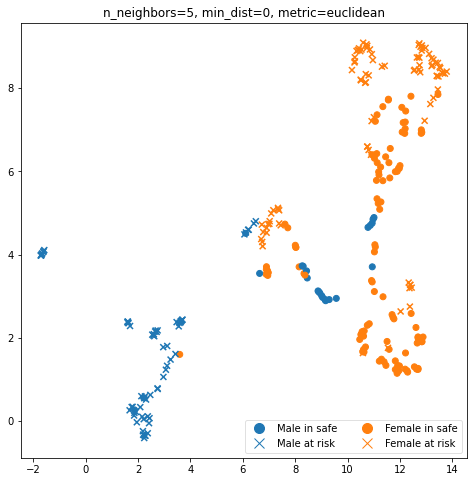

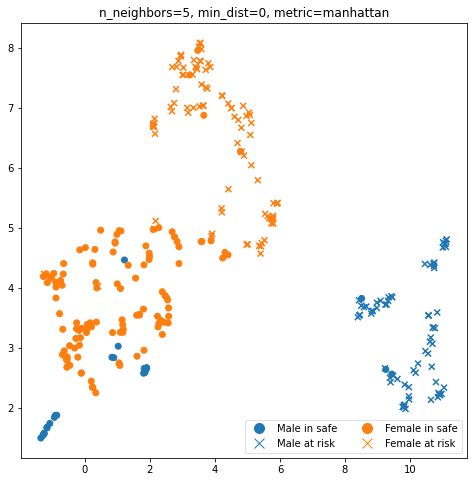

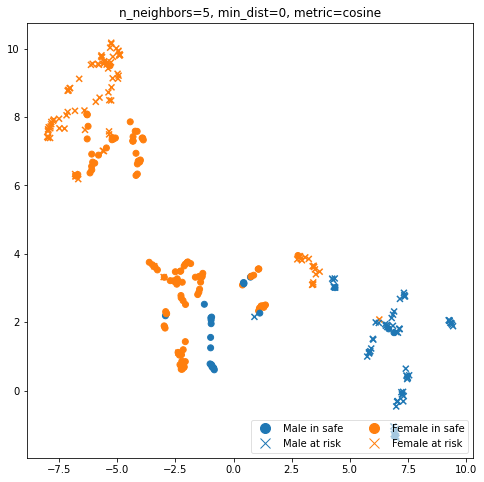

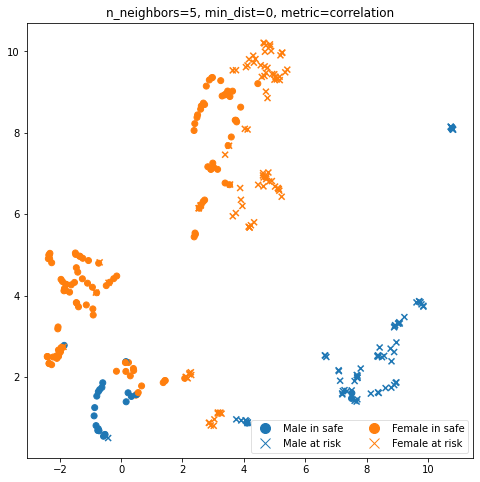

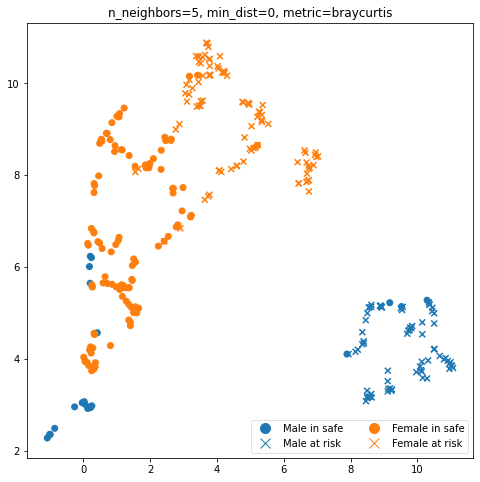

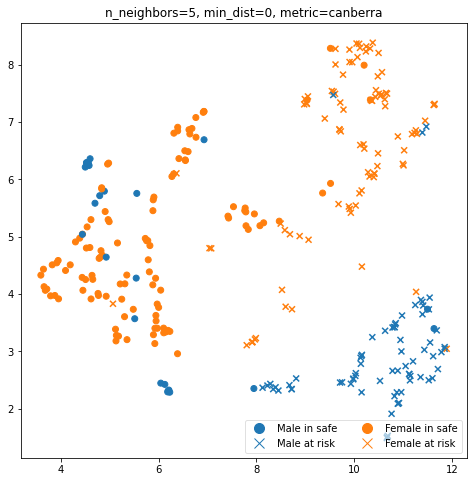

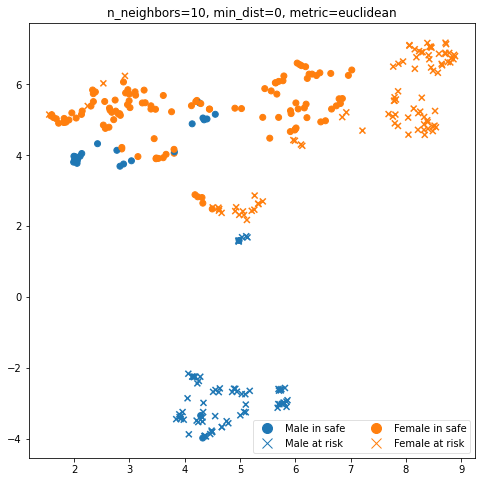

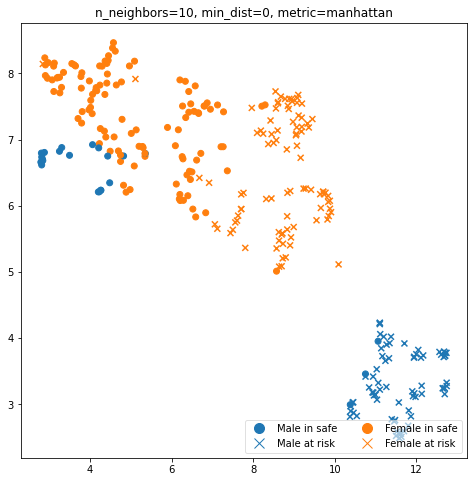

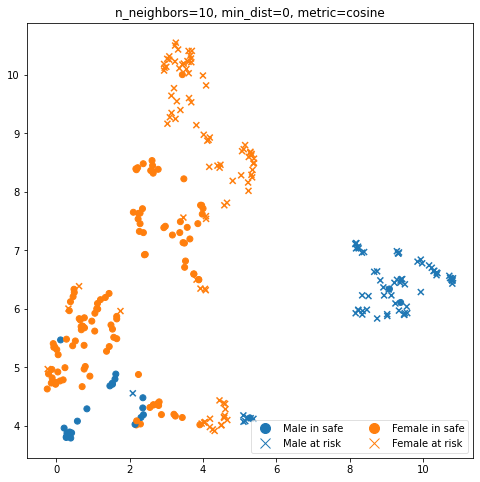

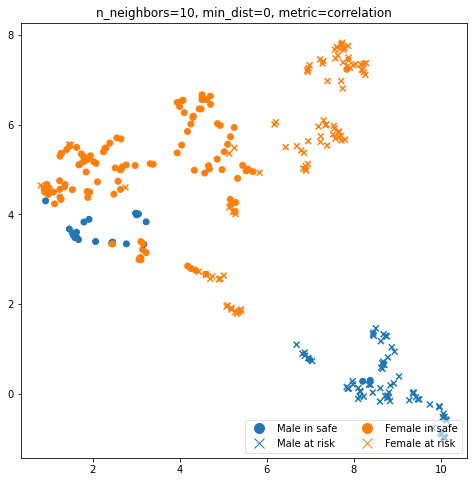

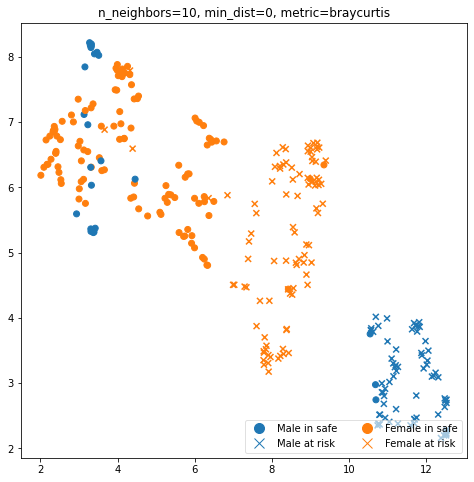

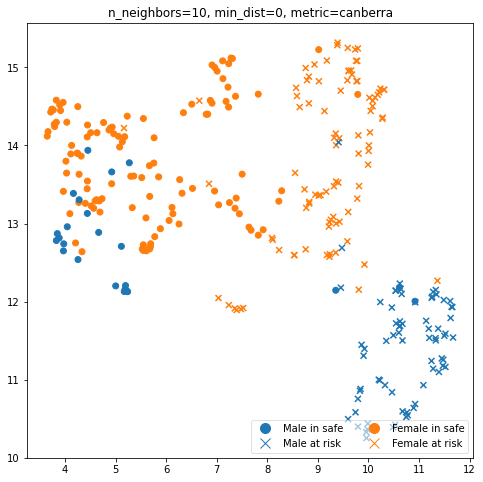

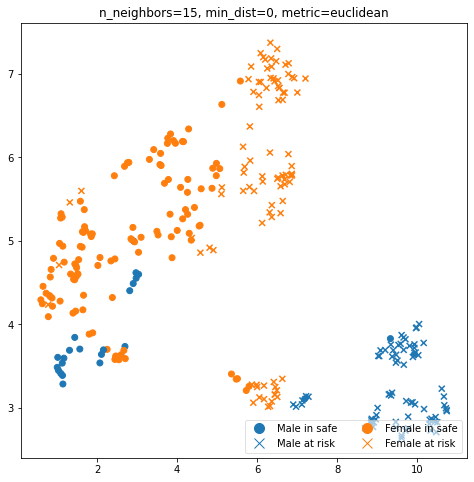

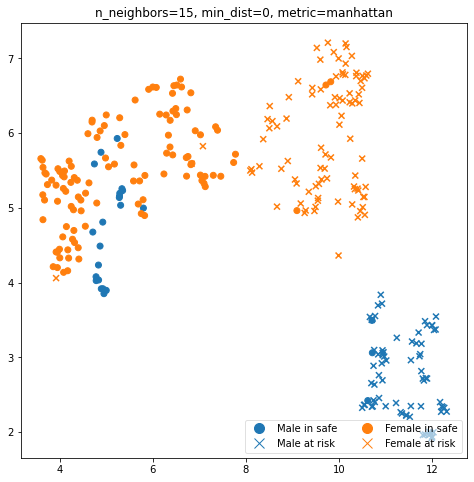

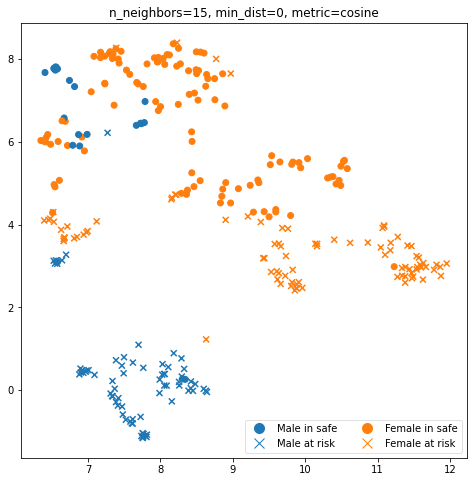

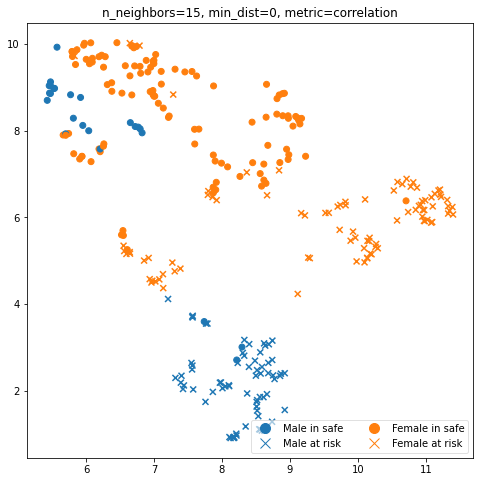

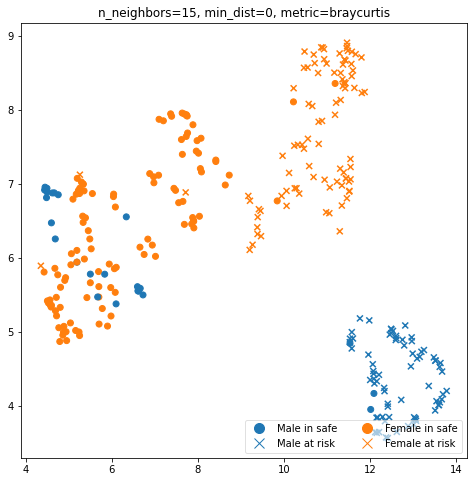

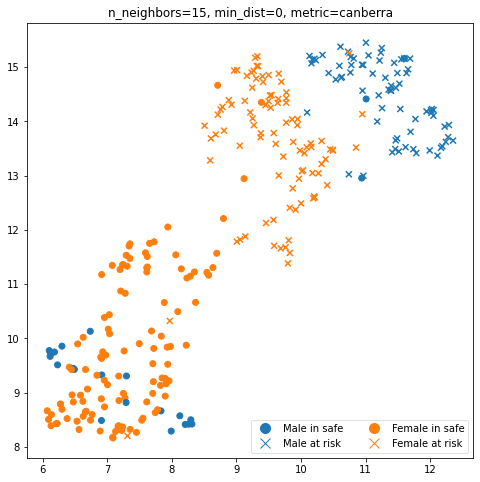

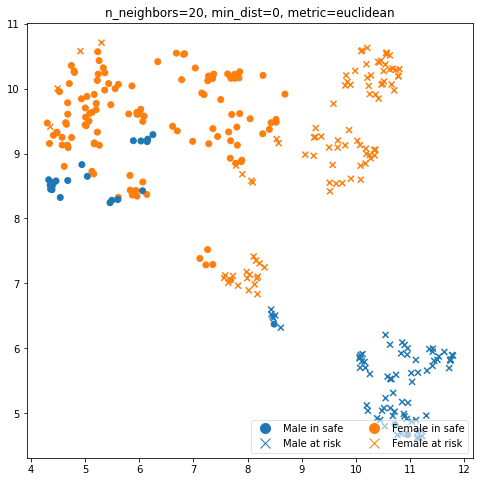

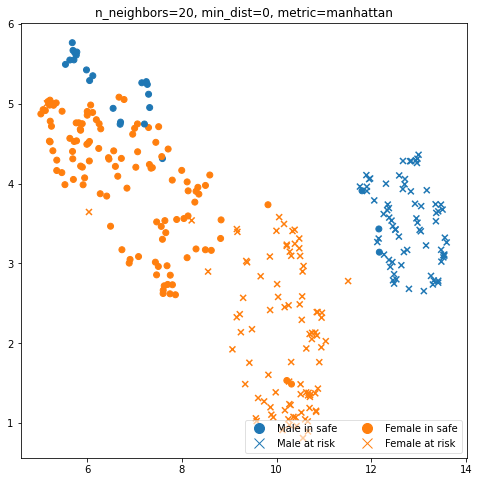

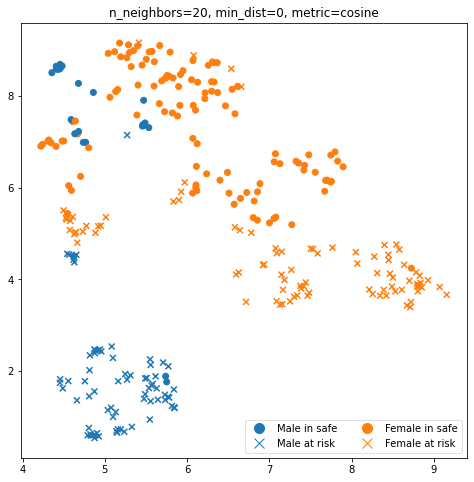

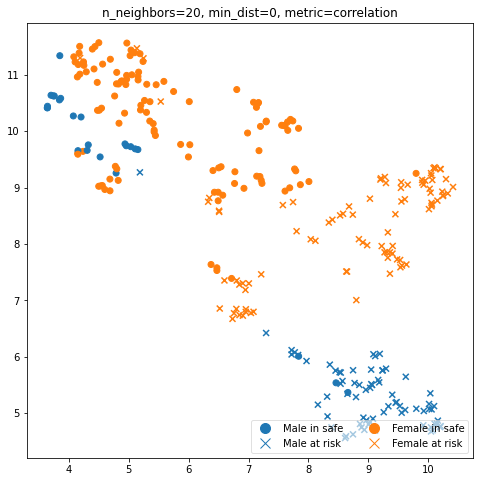

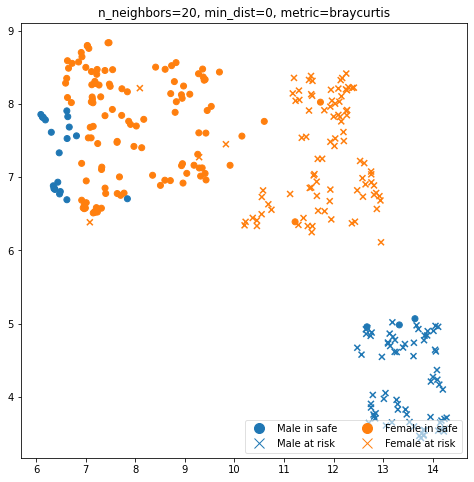

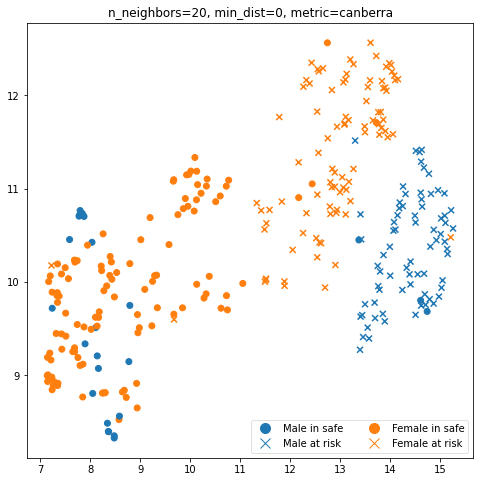

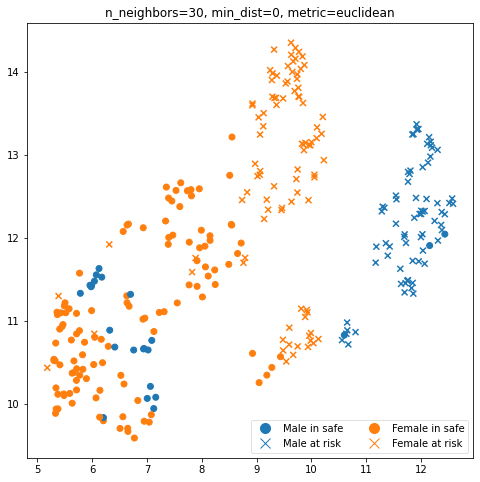

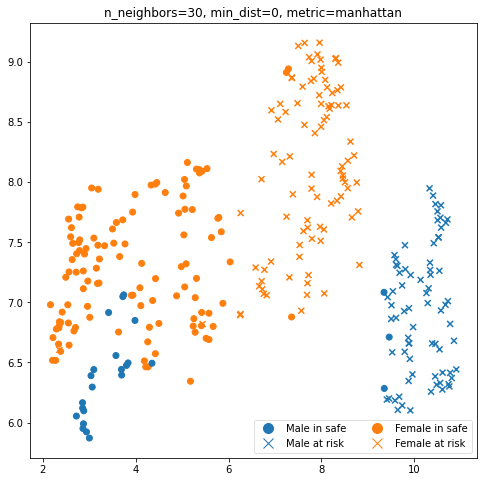

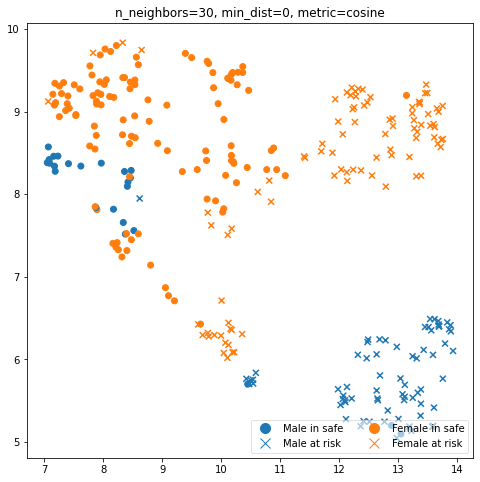

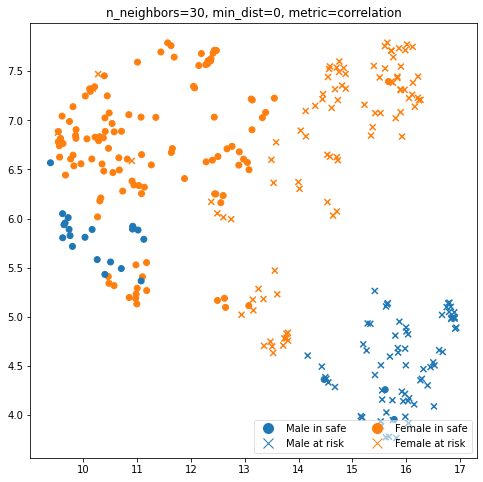

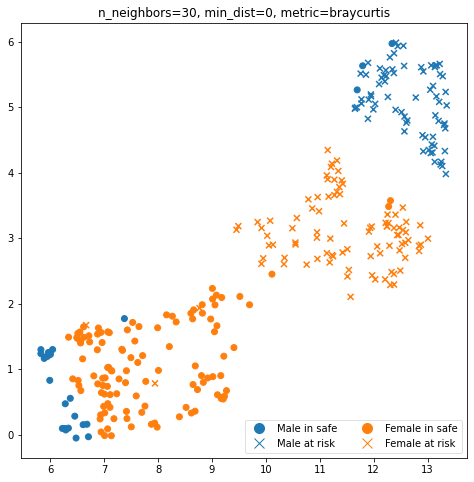

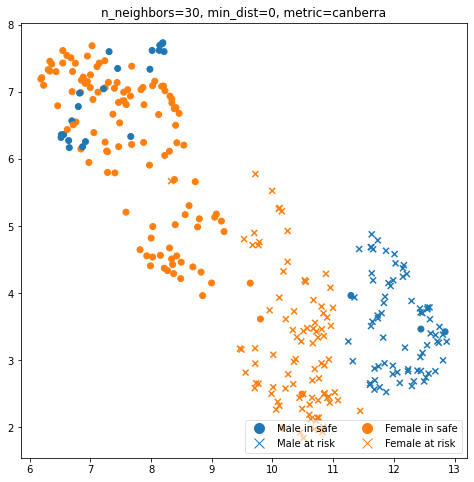

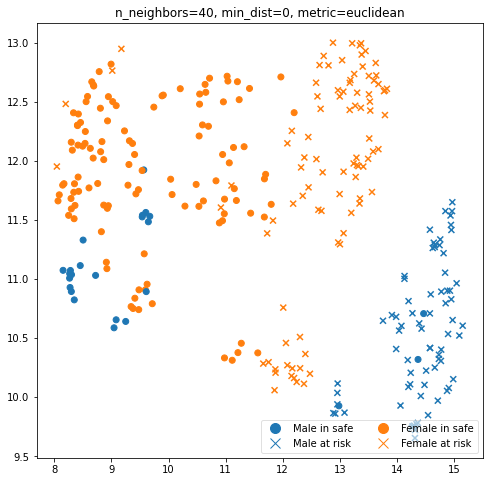

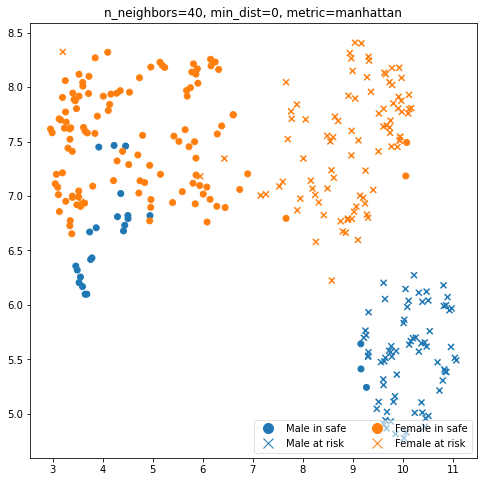

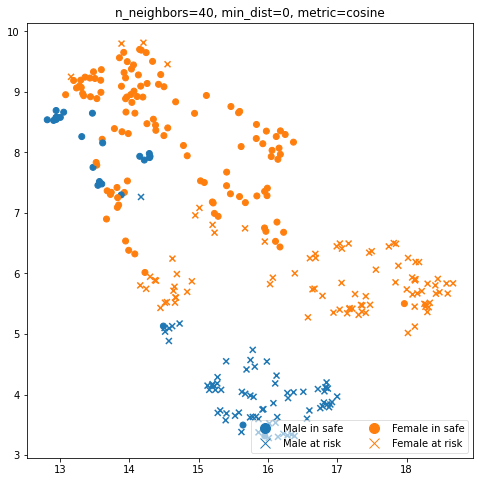

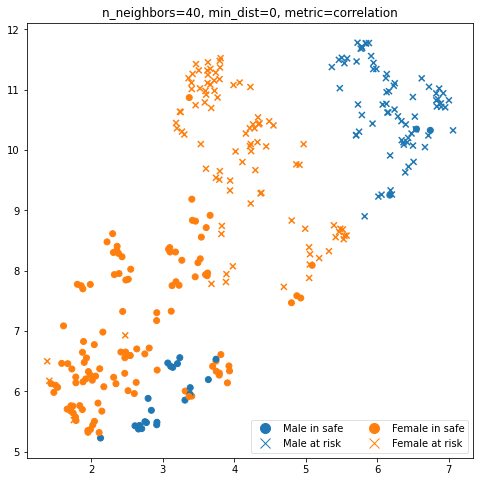

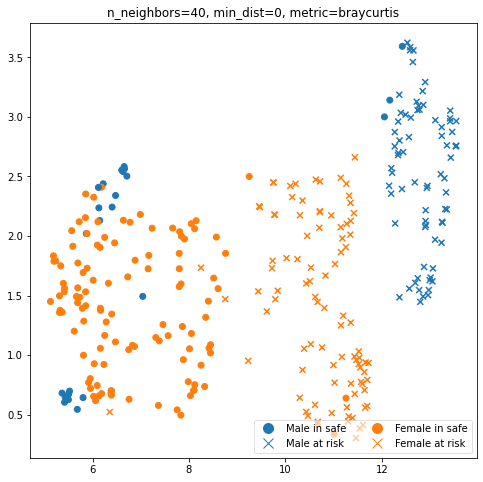

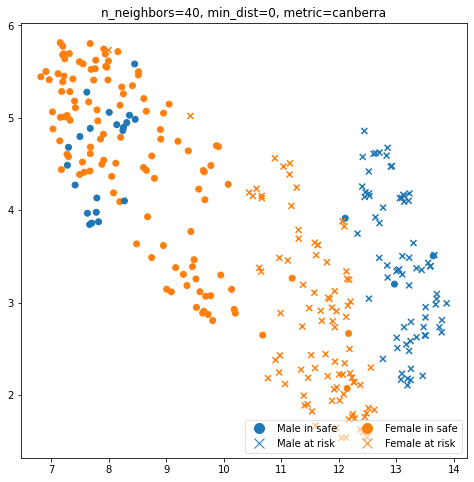

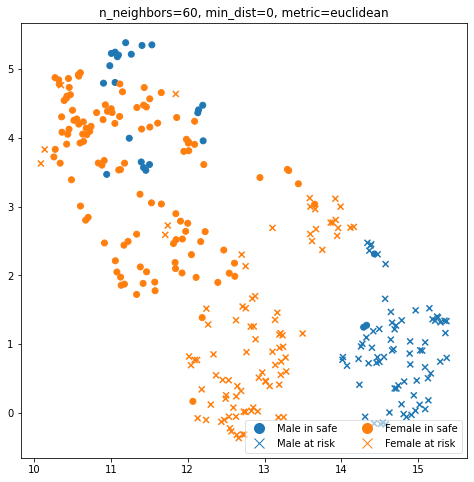

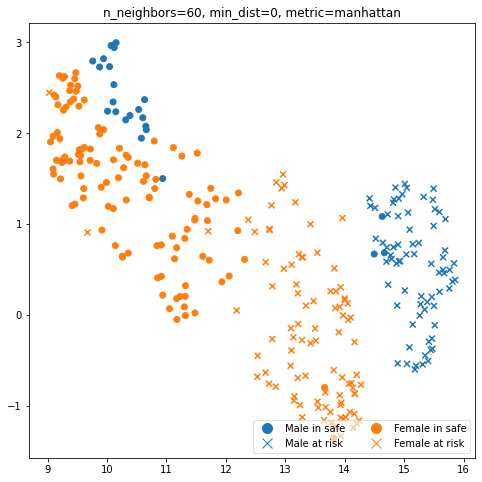

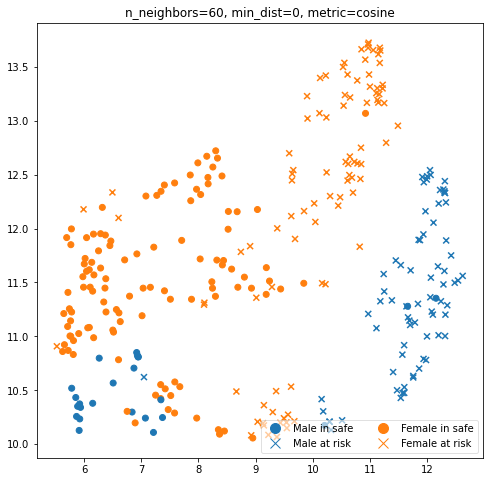

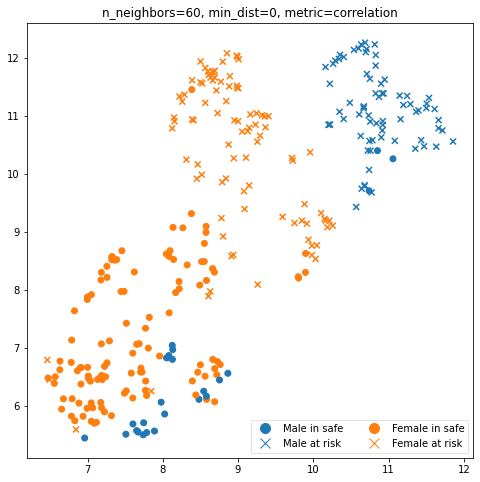

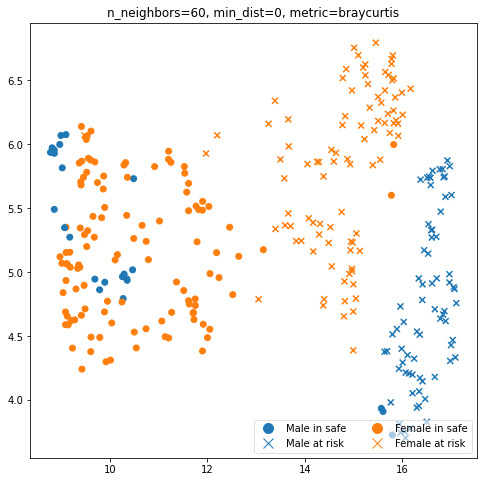

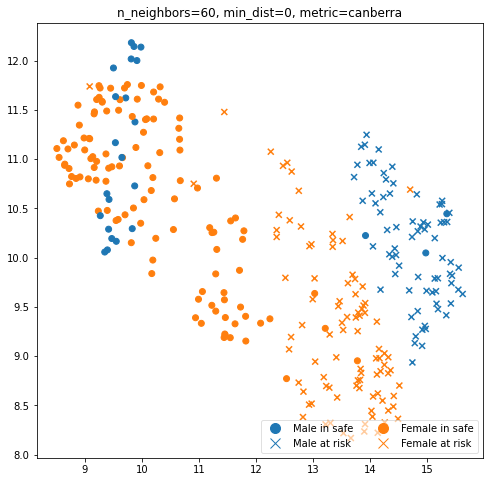

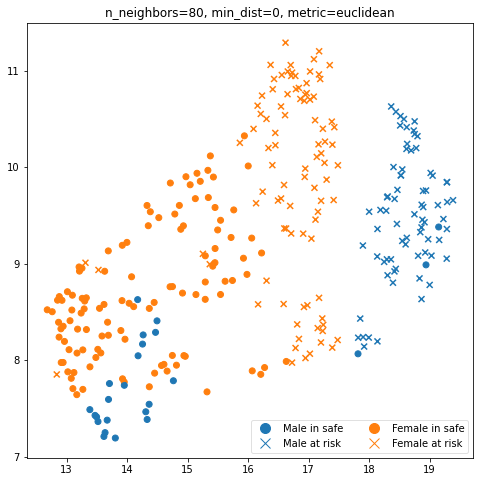

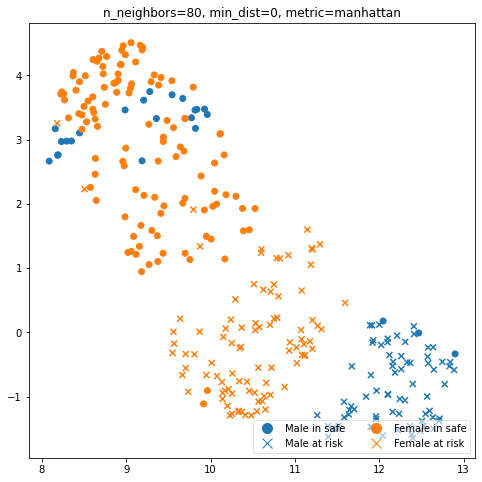

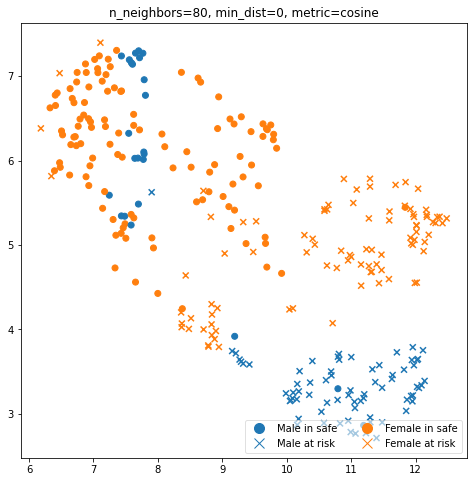

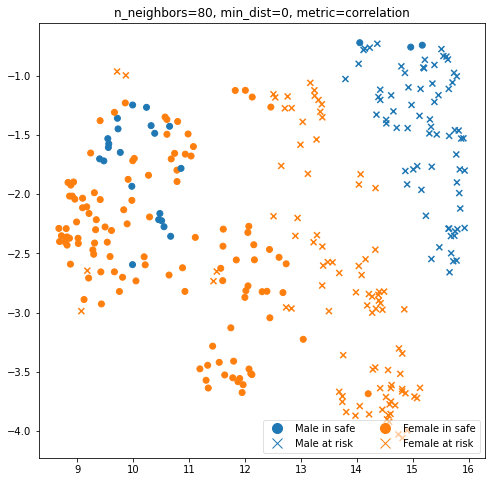

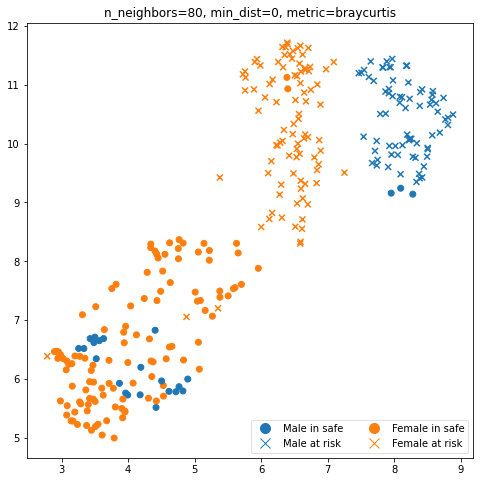

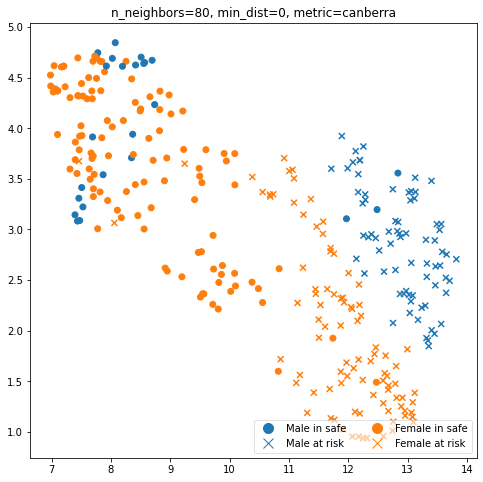

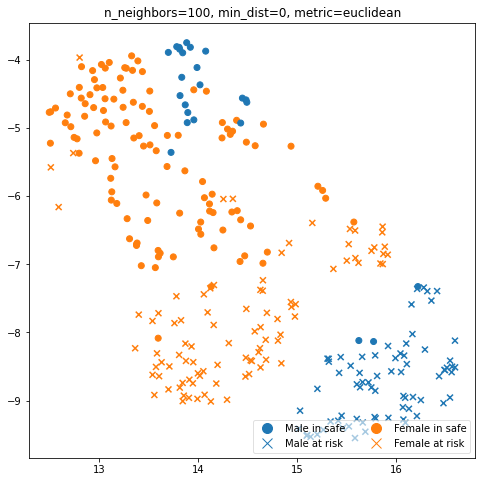

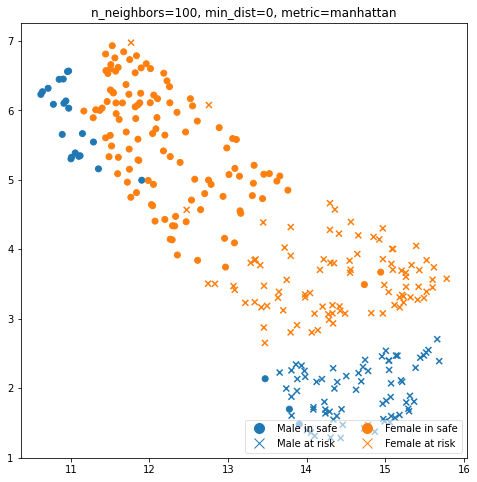

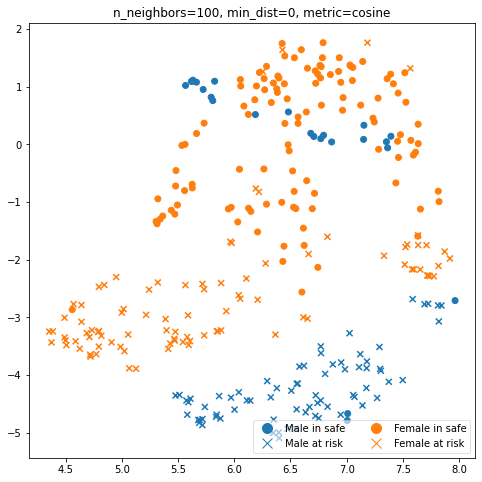

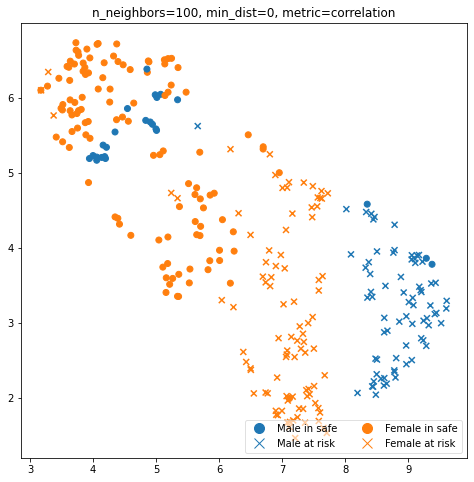

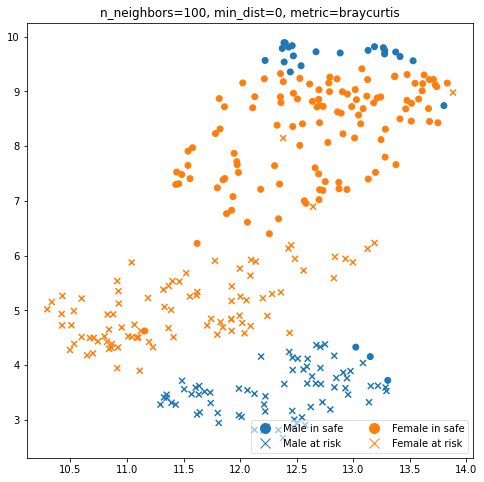

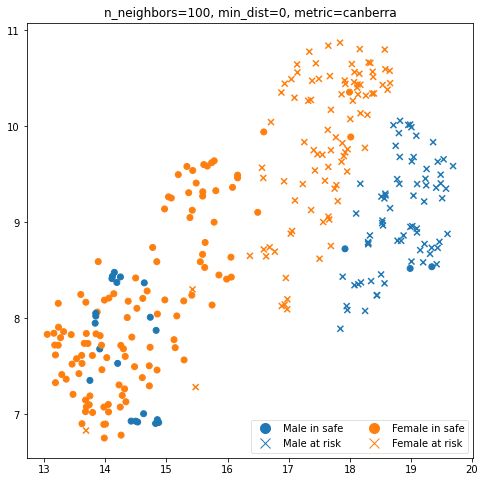

In [8]:
for n in [5, 10, 15, 20, 30, 40, 60, 80, 100]:
    for m in ['euclidean', 'manhattan', 'cosine', 'correlation', 'braycurtis', 'canberra']:
        draw_umap(scaled_data_values, n_neighbors=n, min_dist=0, metric=m)

**Хорошие результаты достигаются на:**
    
* Манхэттенской метрике с 20 соседями;
* метрике Брея-Кёртиса с 80 соседями.

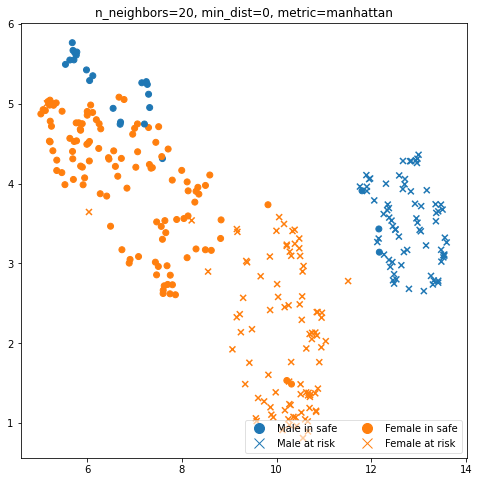

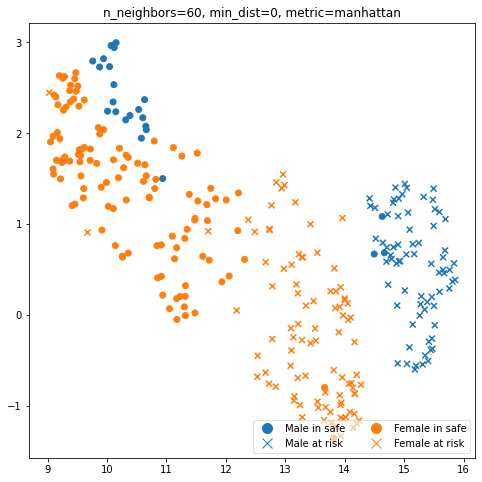

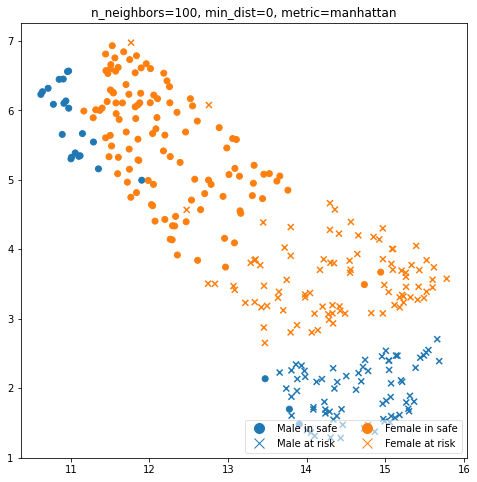

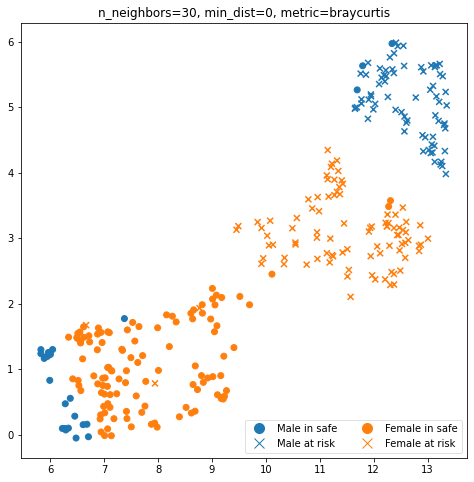

In [9]:
draw_umap(scaled_data_values, n_neighbors=20, min_dist=0, metric='manhattan')
draw_umap(scaled_data_values, n_neighbors=60, min_dist=0, metric='manhattan')
draw_umap(scaled_data_values, n_neighbors=100, min_dist=0, metric='manhattan')
embedding = draw_umap(scaled_data_values, n_neighbors=30, min_dist=0, metric='braycurtis')